In [2]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'

%matplotlib inline

import csv
import re
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import warnings
from csv_reader import read_csv
from aux import set_smallest_n_zero
from disp import set_font_size, get_ordered_colors
from copy import deepcopy as copy
from analysis_tools import *
from pathlib import Path
from csv_reader import read_csv
from csv_writer import write_csv
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import glob

new_rc_params = {
    'text.usetex': False,
    "svg.fonttype": 'none'
}
matplotlib.rcParams.update(new_rc_params)

plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2.0

warnings.filterwarnings('ignore')

In [3]:
def sort_key(s):
    idx_loc = s.find('INDEX_') + 6
    s_trunc = s[idx_loc:]
    return s_trunc

def plot_param_sweep(file_regex, shape, x_tick_labels=None, y_tick_labels=None, y_label='', x_label='', vmax=1000, scale=1, verbose=False):
    loss_fig, loss_axs = plt.subplots(1, 1, figsize=(3 * scale, 3 * scale), sharex=True, sharey=True)

    all_losses = []
    coefs_matrix = []
    all_sort_keys = []

    for f_idx, file_name in enumerate(sorted(glob.glob(file_regex), key=sort_key)):
        if verbose:
            print(sort_key(file_name))
        all_sort_keys.append(sort_key(file_name))

        loss_data_path = f'{file_name}/train_data.csv'
        loss_data = read_csv(loss_data_path, read_header=False)
        if verbose:
            print(np.array(loss_data[loss_data.columns[2:7]]))
        all_losses.append(np.mean(np.array(loss_data[loss_data.columns[2:7]])))


    all_losses = np.array(all_losses).reshape(shape[0], shape[1])
    all_sort_keys = np.array(all_sort_keys).reshape(shape[0], shape[1])
    cbar = loss_axs.matshow(all_losses, vmin=0, vmax=1000, cmap='hot')
    plt.colorbar(cbar, ax=loss_axs)
    loss_axs.set_ylabel(y_label)
    loss_axs.set_xlabel(x_label)

    loss_axs.set_xticks(np.arange(len(x_tick_labels)))
    loss_axs.set_xticklabels([str(l) for l in x_tick_labels], rotation=55, ha='left')
    loss_axs.set_yticks(np.arange(len(y_tick_labels)))
    loss_axs.set_yticklabels([str(l) for l in y_tick_labels])
    
    return all_losses
    
    
#     k_fig.text(0.5, 0.06, 'STDP time const', ha='center')
#     k_fig.text(0.06, 0.5, 'STDP coef', va='center', rotation='vertical')

# Transitions in input parameters

array([[1008.9291982 , 1008.9291982 , 1008.9291982 , 1008.9291982 ],
       [1138.16670194,  242.18068982, 1138.16670194, 1070.83786696],
       [1008.9291982 , 1008.9291982 , 1008.9291982 , 1008.9291982 ],
       [1031.21529931, 4223.80235484, 1031.21529931,  999.57704916]])

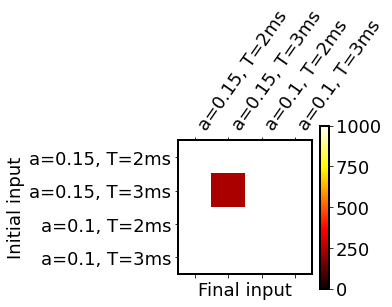

In [12]:
file_regex = './sims_out/2MC_strong_inh_v3*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_0_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    y_tick_labels=['a=0.15, T=2ms', 'a=0.15, T=3ms', 'a=0.1, T=2ms', 'a=0.1, T=3ms'],
    x_label='Final input',
    y_label='Initial input',
)

## Two moment control

array([[ 369.72936556,  932.85405845,  401.64137169, 1684.78857528],
       [ 559.95225952,   55.48195296,  535.57869581,   87.13150708],
       [ 149.11548731,  530.99471875,  170.52412318, 1028.51536722],
       [ 503.69298128,  468.61774659, 1335.82145565,  112.87267541]])

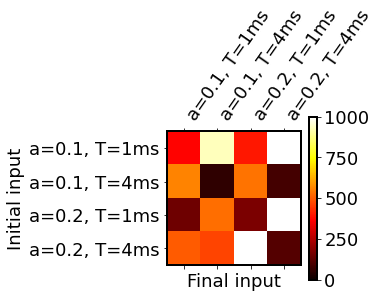

In [13]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 44.68810833, 176.96481243,  34.07582928, 498.84928723],
       [ 26.2108001 ,  93.82274384,  37.51468506, 246.22708989],
       [ 34.40453997, 289.19721039,  42.34195579, 565.24158103],
       [442.46743109,  44.2023325 , 118.89014184,  45.48449196]])

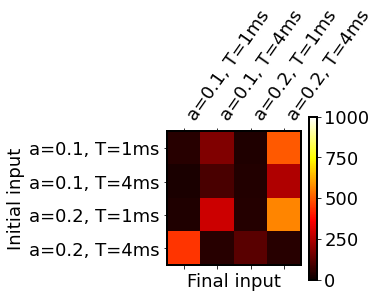

In [14]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.05_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  68.57091453,  437.51225005,   78.46277733, 1329.19502578],
       [  79.41911657,   31.52246028,   93.60248153,  182.19684353],
       [  26.97017654,  194.73970381,   32.69452503,  525.39534136],
       [ 782.70006903,  107.71288351,  424.13110309,   26.30419927]])

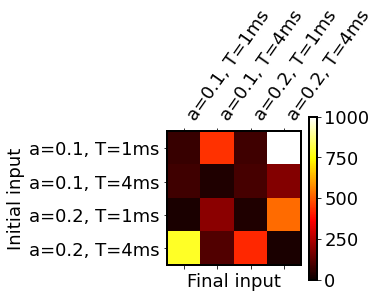

In [15]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 680.86266243, 2350.69345383,  672.50981996, 2321.71980846],
       [ 489.67866126,   26.24041407,  198.55530874,   62.93263101],
       [  55.30473182,  116.04608318,   35.18799328,  357.4226682 ],
       [ 766.34750904,   81.74574358,  575.02128127,   25.87441209]])

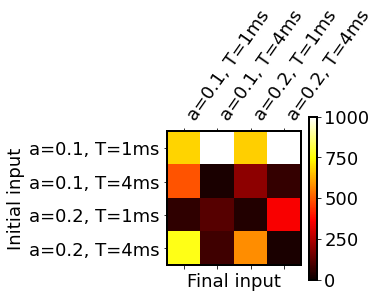

In [41]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_0.5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.5_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[5.05073552e+01, 2.00490040e+04, 4.83041382e+01, 8.38271646e+04],
       [5.65319279e+01, 5.19335887e+01, 6.82657654e+01, 2.24407545e+02],
       [2.19123285e+01, 1.69053153e+02, 2.93752470e+01, 4.57274386e+02],
       [1.20047914e+03, 2.43540788e+02, 4.90775943e+02, 3.56520411e+01]])

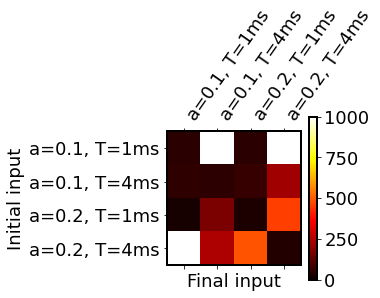

In [46]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 474.21858723, 2091.25890683,  494.04078384, 2061.99224657],
       [ 908.55765821,   55.44501643,  189.15661959,   56.801449  ],
       [  44.43209708,  105.77299521,   43.27544465,  224.89100274],
       [1256.16672333,   48.25279997,  390.01294889,   27.795026  ]])

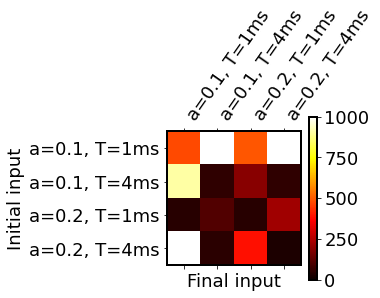

In [43]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.5_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[3512.45108598, 5976.98636255, 3442.43937252, 5918.87923328],
       [1346.88179883,   77.59101581,  456.0544731 ,   67.48591059],
       [  47.34384927,  237.49301425,   46.89400395,  271.88401509],
       [3483.0593126 ,  148.29222814,  666.97059512,   30.89663284]])

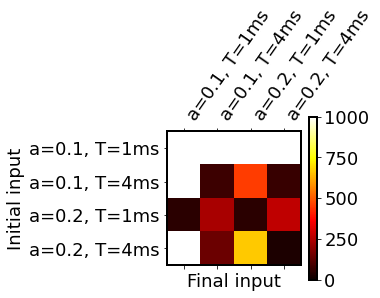

In [44]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-1.0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 175.36687965,  637.46157822,  225.09435135, 1181.04063186],
       [1529.45264933,   48.48397596,  909.27599529,  157.51477574],
       [ 139.39971459,  548.46415326,  173.38430907,  953.84957307],
       [1238.2385132 ,  466.84137734, 1504.34383041,  106.56576921]])

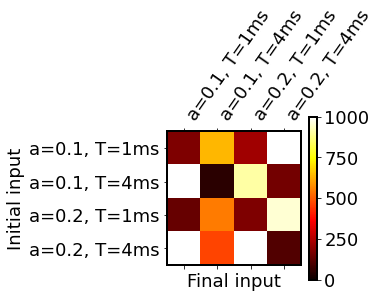

In [6]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 28.50131903, 250.76342732,  26.13580044, 543.36625909],
       [ 27.9877802 ,  98.68046026,  41.68166548, 269.22536068],
       [ 24.88105837, 317.24070591,  26.0461721 , 593.04092986],
       [ 35.46328922,  71.16252141,  69.80024013, 240.53124704]])

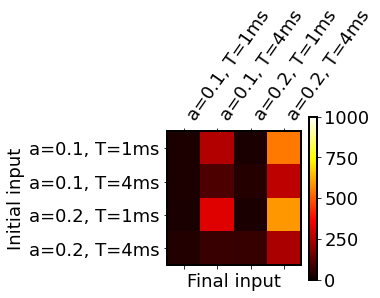

In [5]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.05_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 37.12026343, 176.80302544,  30.38484077, 392.02943445],
       [ 87.83917286,  30.80911189, 106.45592093, 113.72131353],
       [ 25.53498887, 154.62805153,  32.38178888, 323.87093795],
       [897.88024646, 152.61561178, 755.91593646,  45.02006929]])

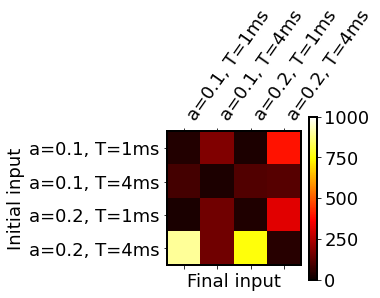

In [7]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_2_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  99.89669021,  591.15164613,  162.95721095, 1030.03278203],
       [ 172.61243722,  104.59764302,  112.52167681,  275.61562805],
       [  59.12809156,  510.39459575,  100.64950107,  846.20420415],
       [ 267.39410358,   51.64603184,  236.17238247,  125.04993295]])

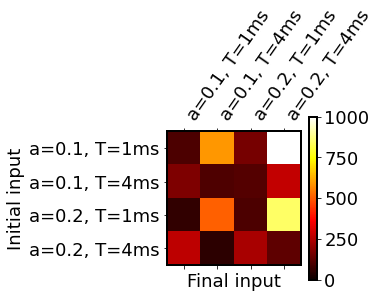

In [8]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.01_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  27.61563198,  709.38990713,   39.11836182, 1152.85710013],
       [  63.07434848,   53.03590345,   61.05348283,  187.70231226],
       [  27.39099245,  497.73317712,   32.799475  ,  796.58880432],
       [  88.93041467,   44.90555488,  100.11062504,  147.57846991]])

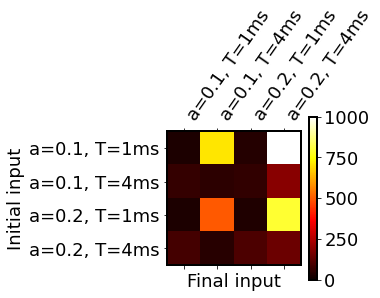

In [9]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.05_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 28.44586373, 428.71145005,  35.13234219, 660.35756733],
       [147.23620062,  25.89556651, 125.37451423,  98.42328783],
       [ 30.97172945, 247.87784259,  33.33139907, 425.9543753 ],
       [423.76665652,  82.34379781, 410.57491623,  29.31919206]])

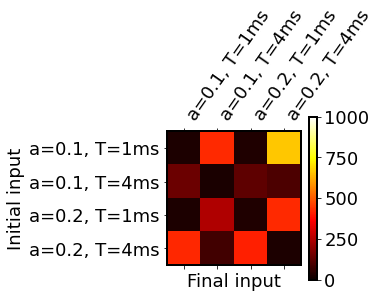

In [10]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_5_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.1_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

## Second moment on excitatory synapses

array([[  61.66838321,  362.14663441,   73.64857664,  608.33735648],
       [ 409.93153177,   46.29498274,  251.53836232,  114.70312257],
       [  51.36473068,  676.3977381 ,   38.80857405, 1067.86377348],
       [3599.45882539,  522.70823119, 3178.95598307,   60.1725847 ]])

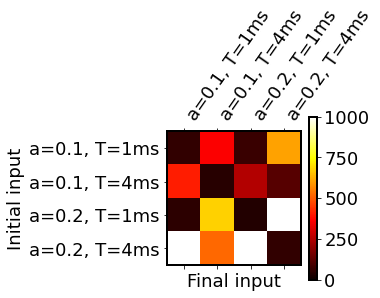

In [24]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_10_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[ 44.89407461, 346.21076792,  82.9930565 , 543.40010986],
       [517.40182787,  51.66416903, 365.32786162, 130.81660711],
       [ 57.86222632, 398.8426569 ,  45.13479068, 541.44211106],
       [684.21932006,  83.36853686, 466.03090581,  76.10329009]])

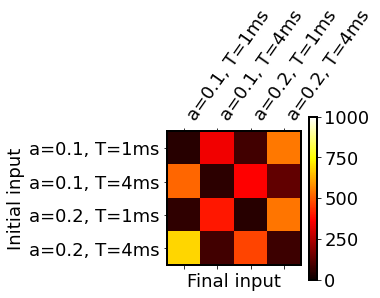

In [45]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_20_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[  48.19842406,  320.02766327,   85.51246623,  470.47189496],
       [ 249.49594245,   58.18838972,  147.78059825,  438.09198275],
       [  84.98879814,  347.56708485,   51.75031262,  430.58998269],
       [1546.50980719,   78.06111251, 1064.86521112,  127.88950256]])

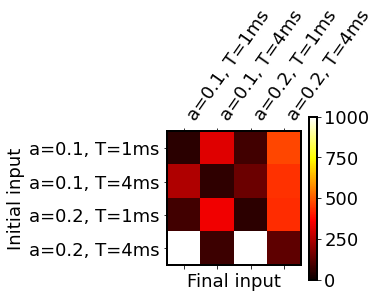

In [26]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_30_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

array([[4.94624256e+01, 2.91629134e+02, 8.98880080e+01, 7.48200166e+02],
       [2.39337428e+02, 5.74172245e+01, 1.36755900e+02, 5.96116113e+24],
       [6.91231113e+01, 3.61673430e+02, 5.64140237e+01, 7.59593697e+02],
       [4.57804403e+04, 9.62591074e+03, 4.39029474e+04, 2.40260336e+02]])

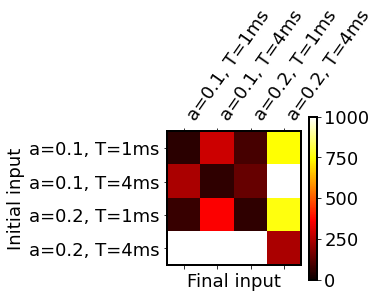

In [27]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_40_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

In [ ]:
file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_50_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'

plot_param_sweep(
    file_regex,
    (4, 4),
    x_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    y_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms'],
    x_label='Final input',
    y_label='Initial input',
)

## First moment on excitatory synapses

In [4]:
def find_batch_num(name):
    idx = name.find('batch')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('_')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def find_trial_num(name):
    idx = name.find('trial')
    trimmed_name = name[idx + 6:]
    idx_underscore = trimmed_name.find('.')
    trimmed_name = trimmed_name[:idx_underscore]
    return int(trimmed_name)

def plot_activities(dir_name, idx_dir, ic_labels, fc_labels, batch_idx=0):
    scale = 1
    fig, axs = plt.subplots(1, 1, figsize=(4 * scale, 7 * scale), sharex=True, sharey=True)
    
    file_regex = os.path.join(dir_name, f'all_r_0_batch_{batch_idx}_trial_*')
#     print(dir_name)
#     print(idx_dir % len(ic_labels))
#     print(ic_labels[int(idx_dir / len(ic_labels))], r'$\rightarrow$', fc_labels[idx_dir % len(ic_labels)])

    initial_activations = []
    final_activations = []

    for file_path in glob.glob(file_regex):

        batch_num = find_batch_num(file_path)
        trial_num = find_trial_num(file_path)

        r = read_csv(file_path, read_header=False)

        if trial_num < 10:
            initial_activations.append(r)
        else:
            final_activations.append(r)

    mean_initial = np.array(initial_activations)
    mean_initial = mean_initial.mean(axis=0)

    mean_final = np.array(final_activations)
    mean_final = mean_final.mean(axis=0)

    if len(mean_initial.shape) > 1:
        n_lines = mean_initial.shape[1]
        cmap = matplotlib.colormaps['plasma']
        colors = cmap(np.linspace(0, 1, n_lines))

        for n_idx in reversed(np.arange(25)):
            axs.plot(np.arange(mean_initial.shape[0]) * 0.1, 0.25 * n_idx + mean_initial[:, n_idx], '--', c=colors[n_idx])
            axs.plot(np.arange(mean_final.shape[0]) * 0.1, 0.25 * n_idx + mean_final[:, n_idx], c=colors[n_idx])
        axs.set_xlabel('Time (ms)')
        axs.set_ylabel('Firing rate')
        axs.set_yticks([])
        axs.set_title(ic_labels[int(idx_dir / len(ic_labels))] + r'$\rightarrow$' + fc_labels[idx_dir % len(ic_labels)])

#         axs.set_xlim(0, 1000)



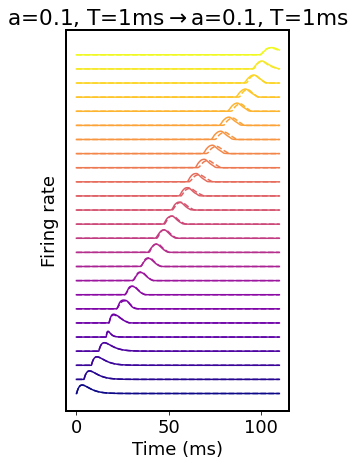

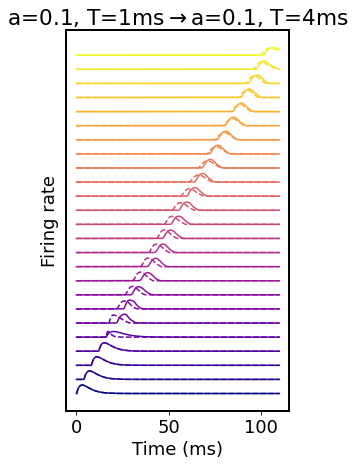

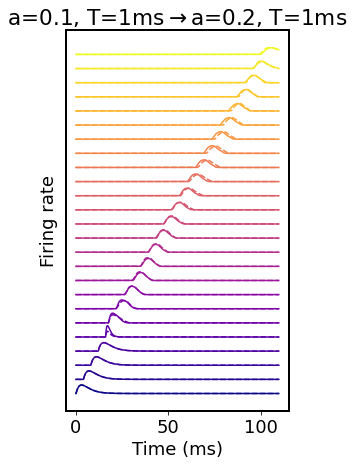

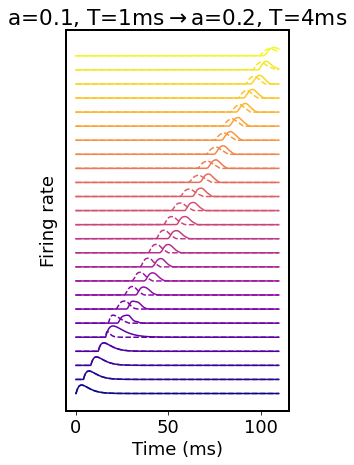

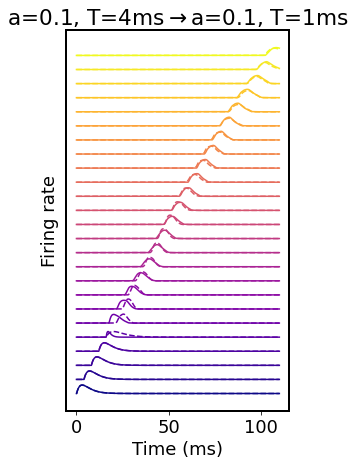

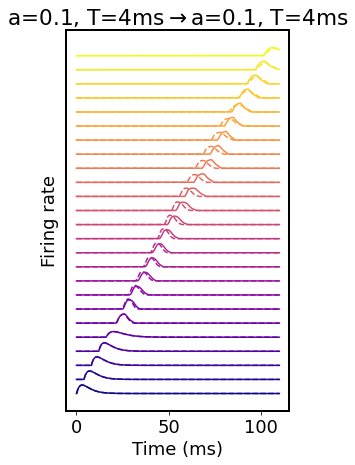

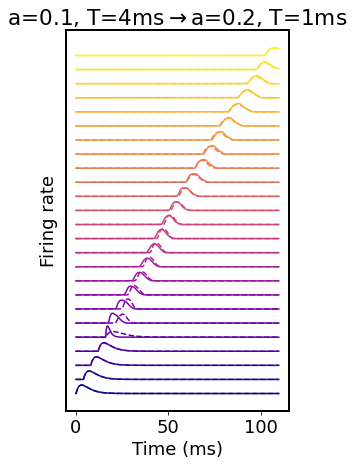

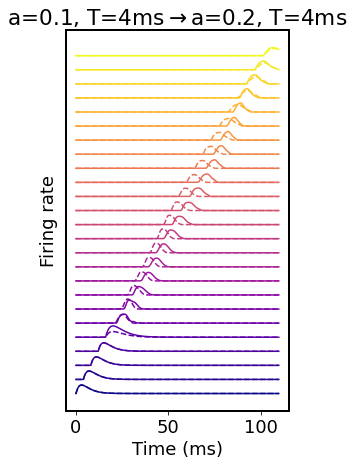

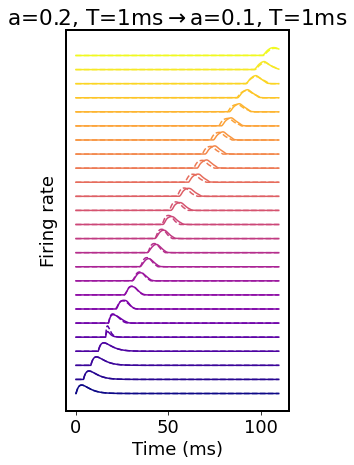

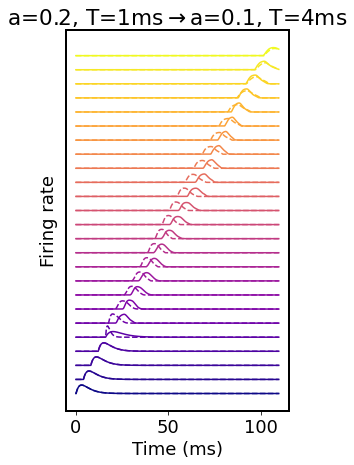

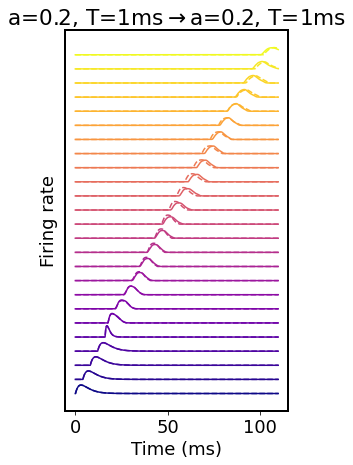

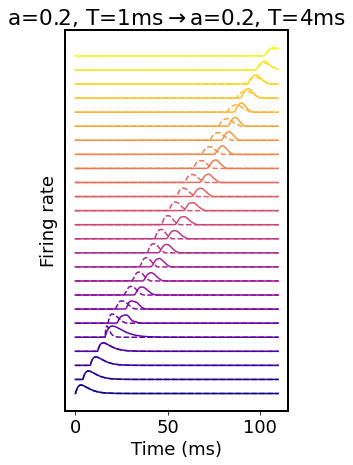

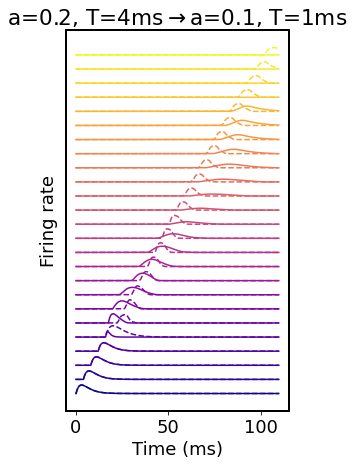

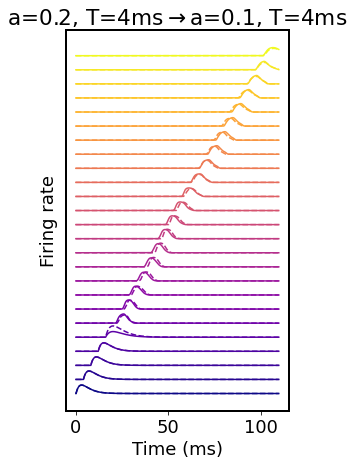

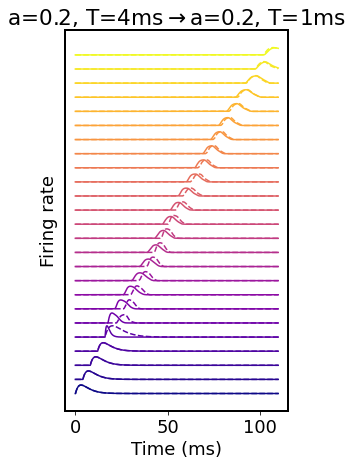

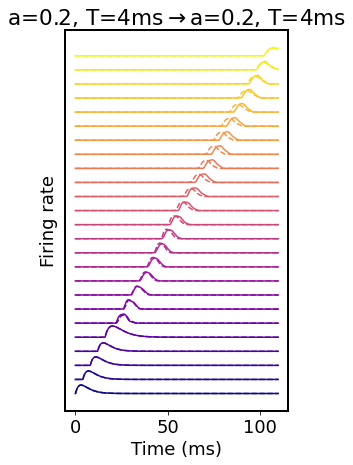

In [5]:
ic_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']
fc_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']

file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_1.0_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_-0.05_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_1_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)

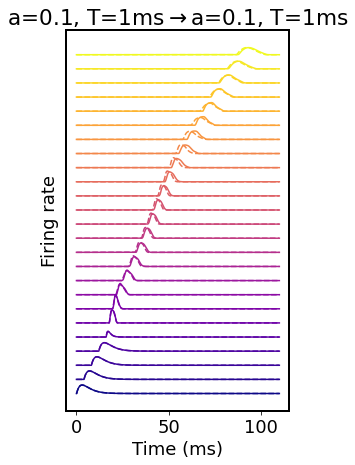

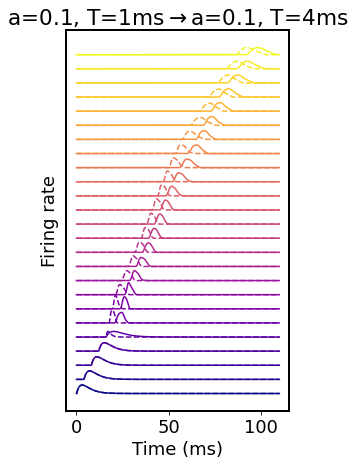

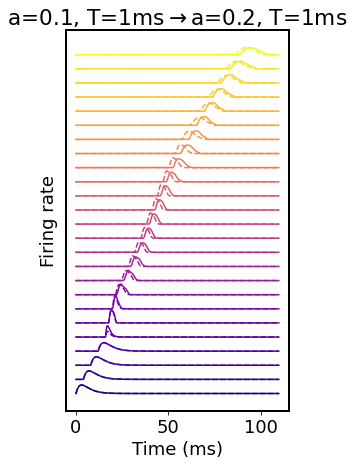

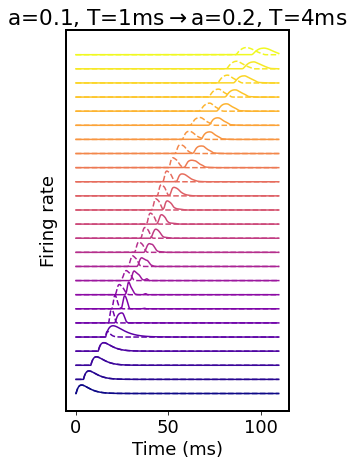

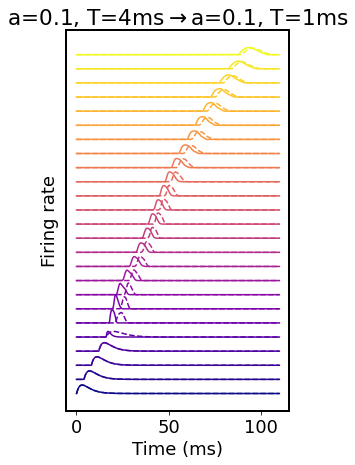

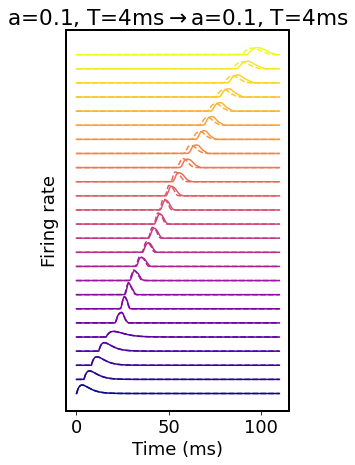

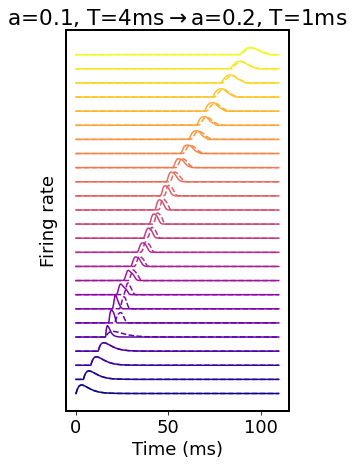

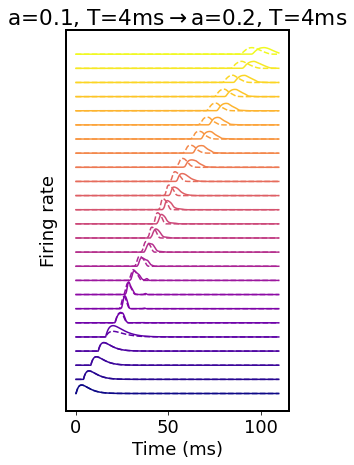

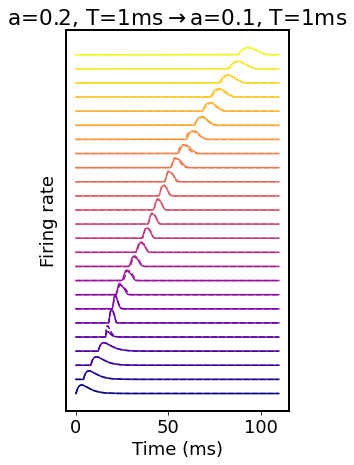

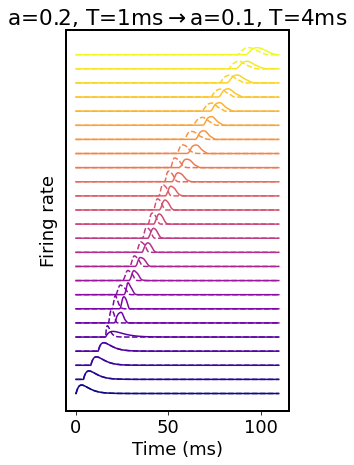

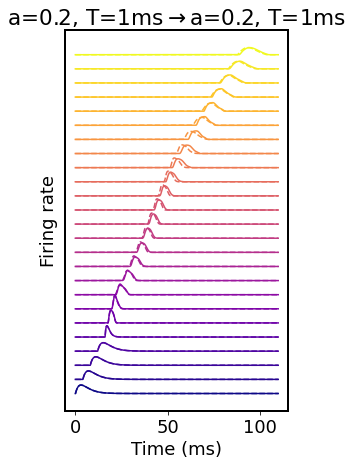

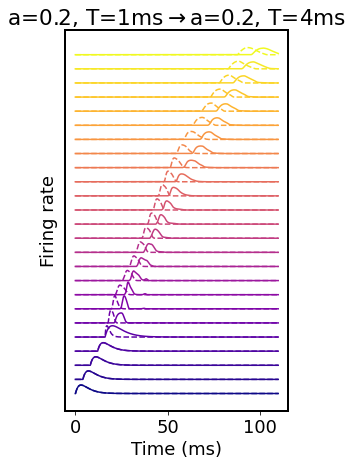

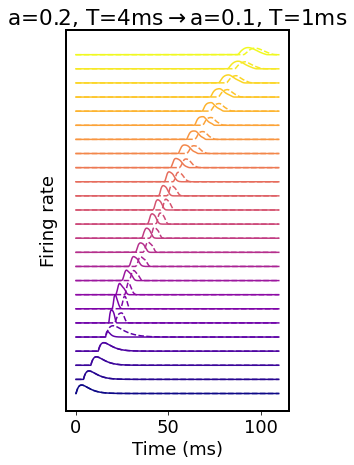

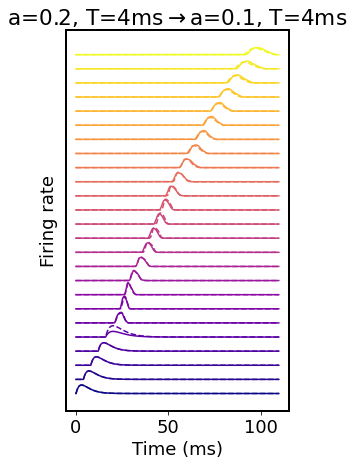

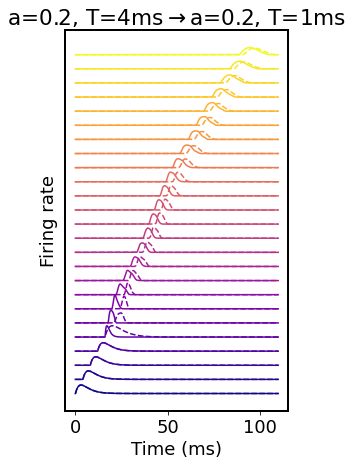

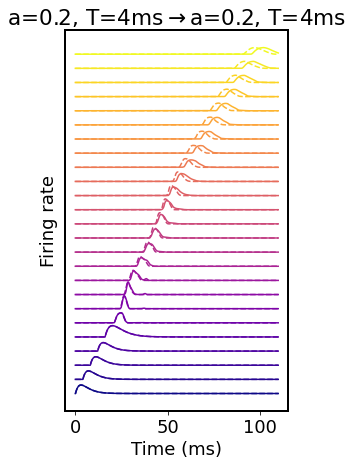

In [6]:
ic_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']
fc_tick_labels=['a=0.1, T=1ms', 'a=0.1, T=4ms', 'a=0.2, T=1ms', 'a=0.2, T=4ms']

file_regex = './sims_out/2MC_strong_inh_v4*SEED_2_*_EXC_RULE_SETPOINT_0.1_EXC_RULE_RATE_20_INH_RULE_SETPOINT_0.4_INH_RULE_RATE_0_EXC_M1_C_0_EXC_M2_C_1_INH_M1_C_0_INH_M2_C_0_*'
for idx_dir, dir_name in enumerate(sorted(glob.glob(file_regex))):
    plot_activities(dir_name, idx_dir, ic_tick_labels, fc_tick_labels, batch_idx=0)